# SI 671: Final Project <br>
### Setiment Analysis of Donald Trump and Barack Obama's Tweets <br>
#### Maheen Asghar, Dorsa Massihpour


**Import Data**

In [1]:
import numpy as np
import pandas as pd

In [6]:

# Trump dataset (years 2009-2016)
from google.colab import files
uploaded = files.upload()
df_trump = pd.read_csv("Trump.csv", encoding = "ISO-8859-1") 


Saving Trump2.csv to Trump2.csv


In [0]:
df_trump = pd.read_csv("Trump2.csv") 

In [10]:
# Obama datasets 
from google.colab import files
uploaded = files.upload()
df_obama1 = pd.read_csv("whtweets.csv")


Saving whtweets.csv to whtweets.csv


In [11]:
from google.colab import files
uploaded = files.upload()
df_obama2 = pd.read_csv("potustweets.csv")


Saving potustweets.csv to potustweets.csv


In [0]:
df_obama1 = pd.read_csv("whtweets.csv")
df_obama2 = pd.read_csv("potustweets.csv")



In [15]:
df_trump

,date,time,tweet,client,client_simplified
0,2017-01-27,18:46:22,I promise that our administration will ALWAYS...,Twitter for iPhone,Twitter for iPhone
1,2017-01-27,17:00:47,Congratulations Secretary Mattis! https://t.c...,Twitter for iPhone,Twitter for iPhone
2,2017-01-27,15:20:15,Statement on International Holocaust Remembra...,Twitter for iPhone,Twitter for iPhone
3,2017-01-27,11:30:29,.@VP Mike Pence will be speaking at today's #...,Twitter for iPhone,Twitter for iPhone
4,2017-01-27,11:27:02,The #MarchForLife is so important. To all of ...,Twitter for iPhone,Twitter for iPhone
...,...,...,...,...,...
30380,2009-05-12,10:07:28,"""My persona will never be that of a wallflower...",Twitter Web Client,Twitter Web Client
30381,2009-05-08,16:40:15,New Blog Post: Celebrity Apprentice Finale and...,Twitter Web Client,Twitter Web Client
30382,2009-05-08,09:38:08,Donald Trump reads Top Ten Financial Tips on L...,Twitter Web Client,Twitter Web Client
30383,2009-05-04,21:00:10,Donald Trump will be appearing on The View tom...,Twitter Web Client,Twitter Web Client


In [16]:
# Drop columns with all NaN
df_obama1_new = df_obama1.dropna(axis=1, how='all')
df_obama1_new.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls
0,798914779213500422,NaN,NaN,2016-11-16 15:45:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""Nothing can break the spirit of the Greek peo...",NaN,NaN,NaN,http://snpy.tv/2f3WnrO
1,798909747357450240,NaN,NaN,2016-11-16 15:25:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""We've proven that you can grow the economy an...",NaN,NaN,NaN,http://snpy.tv/2fF7a9R
2,798908490152448001,NaN,NaN,2016-11-16 15:20:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""The basic longing to live with dignity...thes...",NaN,NaN,NaN,http://snpy.tv/2f3VOy5
3,798907196469870592,NaN,NaN,2016-11-16 15:14:53 +0000,"<a href=""https://about.twitter.com/products/tw...",RT @SecBurwell: Over a million people selected...,7.989025e+17,2.458567e+09,2016-11-16 14:56:12 +0000,NaN
4,798899681472421888,NaN,NaN,2016-11-16 14:45:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""Democracy...allows us to peacefully work thro...",NaN,NaN,NaN,http://snpy.tv/2fwHTBp
5,798893390775615492,NaN,NaN,2016-11-16 14:20:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""We can't look backwards for answers, we have ...",NaN,NaN,NaN,http://snpy.tv/2fVEjNS
6,798884581923397632,NaN,NaN,2016-11-16 13:45:01 +0000,"<a href=""https://about.twitter.com/products/tw...",“In all of our nations it will always be our c...,NaN,NaN,NaN,http://snpy.tv/2fVC4dG
7,798877430207365121,NaN,NaN,2016-11-16 13:16:36 +0000,"<a href=""https://about.twitter.com/products/tw...","""The flame first lit here…was fanned by Americ...",NaN,NaN,NaN,http://snpy.tv/2fYdyKi
8,798872343007334400,NaN,NaN,2016-11-16 12:56:23 +0000,"<a href=""https://about.twitter.com/products/tw...",“I still believe there’s more of what Greeks c...,NaN,NaN,NaN,NaN
9,798871271706685440,NaN,NaN,2016-11-16 12:52:08 +0000,"<a href=""https://about.twitter.com/products/tw...","""Progress is never guaranteed. Progress has to...",NaN,NaN,NaN,NaN


In [17]:
# Drop columns with all NaN
df_obama2_new = df_obama2.dropna(axis=1, how='all')
df_obama2_new.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls
0,797128959578271744,NaN,NaN,2016-11-11 17:28:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, we honor those who honored our country ...",NaN,NaN,NaN,NaN
1,796018814072672256,NaN,NaN,2016-11-08 15:57:29 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Today, progress is on the ballot. Go vote - th...",NaN,NaN,NaN,NaN
2,794322003754790913,NaN,NaN,2016-11-03 23:34:58 +0000,"<a href=""https://studio.twitter.com"" rel=""nofo...","It's pretty simple: Find a plan, get covered, ...",NaN,NaN,NaN,"http://HealthCare.gov,http://twitter.com/POTUS..."
3,794057504871346176,NaN,NaN,2016-11-03 06:03:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",It happened: @Cubs win World Series. That's ch...,NaN,NaN,NaN,NaN
4,790236602584948736,NaN,NaN,2016-10-23 17:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'll say it: Holy Cow, @Cubs fans. Even this W...",NaN,NaN,NaN,NaN
5,789598150541635588,NaN,NaN,2016-10-21 22:44:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Check out my newest science advisors! These ki...,NaN,NaN,NaN,http://twitter.com/POTUS/status/78959815054163...
6,789265672404627456,NaN,NaN,2016-10-21 00:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @vj44: We lit the @WhiteHouse pink tonight ...,7.892374e+17,595515713.0,2016-10-20 22:50:32 +0000,http://twitter.com/vj44/status/789237393719255...
7,789096632537055232,NaN,NaN,2016-10-20 13:31:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Outstanding 3 for 3 debate sweep for @HillaryC...,NaN,NaN,NaN,NaN
8,788098889140219904,NaN,NaN,2016-10-17 19:26:31 +0000,"<a href=""http://twitter.com/#!/download/ipad"" ...",For the loved ones we've lost and the ones we ...,NaN,NaN,NaN,https://twitter.com/vp/status/788097252522721280
9,787662124197830656,NaN,NaN,2016-10-16 14:30:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For a century, Planned Parenthood has made it ...",NaN,NaN,NaN,NaN


In [18]:
# Combine Obama datasets vertically 
df_obama = pd.concat([df_obama1, df_obama2])
print(len(df_obama1))
print(len(df_obama2))
print(len(df_obama))
df_obama.rename(columns={'text':'tweet'}, inplace=True)
df_obama

27346
321
27667


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls
0,798914779213500422,NaN,NaN,2016-11-16 15:45:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""Nothing can break the spirit of the Greek peo...",NaN,NaN,NaN,http://snpy.tv/2f3WnrO
1,798909747357450240,NaN,NaN,2016-11-16 15:25:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""We've proven that you can grow the economy an...",NaN,NaN,NaN,http://snpy.tv/2fF7a9R
2,798908490152448001,NaN,NaN,2016-11-16 15:20:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""The basic longing to live with dignity...thes...",NaN,NaN,NaN,http://snpy.tv/2f3VOy5
3,798907196469870592,NaN,NaN,2016-11-16 15:14:53 +0000,"<a href=""https://about.twitter.com/products/tw...",RT @SecBurwell: Over a million people selected...,7.989025e+17,2.458567e+09,2016-11-16 14:56:12 +0000,NaN
4,798899681472421888,NaN,NaN,2016-11-16 14:45:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""Democracy...allows us to peacefully work thro...",NaN,NaN,NaN,http://snpy.tv/2fwHTBp
...,...,...,...,...,...,...,...,...,...,...
316,601841646020464640,6.017708e+17,4.369725e+07,2015-05-22 20:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@rebsteve really enjoyed stopping by today. I...,NaN,NaN,NaN,http://twitter.com/POTUS/status/60184164602046...
317,601082858497830913,NaN,NaN,2015-05-20 17:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",An honor to address the Coast Guard class of 2...,NaN,NaN,NaN,http://twitter.com/POTUS/status/60108285849783...
318,600407380279566336,6.003898e+17,1.330457e+09,2015-05-18 21:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Good question, @billclinton. The handle comes ...",NaN,NaN,NaN,NaN
319,600388258665787392,NaN,NaN,2015-05-18 19:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","In Camden today, seeing first-hand how smart p...",NaN,NaN,NaN,http://twitter.com/POTUS/status/60038825866578...


**Preprocess**

In [0]:
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

class PreProcessTweets:
    def __init__(self):
        self._stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
        
    def processTweets(self, list_of_tweets):
        processedTweets=[]
        for tweet in list_of_tweets:
            processedTweets.append((self._processTweet(tweet["text"]),tweet["label"]))
        return processedTweets
    
    def _processTweet(self, tweet):
        tweet = tweet.lower() # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
        tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
        return [word for word in tweet if word not in self._stopwords]


# Source:
# https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed

In [20]:
!pip install tweet-preprocessor

  Created wheel for tweet-preprocessor: filename=tweet_preprocessor-0.5.0-cp36-none-any.whl size=7947 sha256=55835ce8cd6ff27209ff4d9628a5c0196a70972dcd80149327bf9e60c9d95a30
  Stored in directory: /root/.cache/pip/wheels/1b/27/cc/49938e98a2470802ebdefae9d2b3f524768e970c1ebbe2dc4a
Successfully built tweet-preprocessor


In [0]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p

#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)


#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

# Source:
# https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf

In [0]:
import preprocessor as p

clean_text_list = []
for tweet in df_trump['tweet']:
    clean_text_list.append(p.clean(tweet))


In [23]:
# Function for further preprocessing
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize


def clean_tweets(tweet):
 
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
#after tweepy preprocessing the colon symbol left remain after      #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
#replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
#remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
#filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
#looping through conditions
    for w in word_tokens:
#check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)return tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Trump**

In [25]:
trump_filtered_text_list = []
for cleaned_tweet in clean_text_list:
  trump_filtered_text_list.append(clean_tweets(cleaned_tweet))
trump_filtered_text_list[1:10]

['Congratulations Secretary Mattis',
 'Statement International Holocaust Remembrance Day',
 "Mike Pence speaking today 's -- You full support",
 'The important To marching -- full support',
 'Mexico taken advantage U.S. long enough Massive trade deficits little help weak border must change NOW',
 'Look forward seeing final results VoteStand Gregg Phillips crew say least ,000,000 votes illegal We must better',
 'Miami-Dade Mayor drops sanctuary policy Right decision Strong',
 'Will interviewed :00pm tonight Enjoy',
 'Spoke Congressional Retreat Philadelphia PA. afternoon w/ Th…']

In [0]:
# Convert to lowercase, remove numbers, remove punctuation, remove whitespaces
#  (leading and ending spaces)
trump_final_preprocessed_tweets=[]
for tweet in trump_filtered_text_list:
  tweet_new1 = tweet.lower()
  #tweet_new2 = re.sub(r’\d+’, ‘’, tweet_new1)
  tweet_new2 = re.sub(r'\d+', '', tweet_new1)
  #tweet_new3 = tweet_new2.translate(string.maketrans(“”,””), string.punctuation)
  tweet_new3 = re.sub(r'[^\w\s]','', tweet_new2)
  tweet_new4 = tweet_new3.strip()
  trump_final_preprocessed_tweets.append(tweet_new4)

# Source:
# https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

In [27]:
trump_final_preprocessed_tweets[1:10]

['congratulations secretary mattis',
 'statement international holocaust remembrance day',
 'mike pence speaking today s  you full support',
 'the important to marching  full support',
 'mexico taken advantage us long enough massive trade deficits little help weak border must change now',
 'look forward seeing final results votestand gregg phillips crew say least  votes illegal we must better',
 'miamidade mayor drops sanctuary policy right decision strong',
 'will interviewed pm tonight enjoy',
 'spoke congressional retreat philadelphia pa afternoon w th']

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
# # Stemming using nltk
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# stemmer= PorterStemmer()
# #input_str=”There are several types of stemming algorithms.”
# #input_str=word_tokenize(input_str)
# trump_stemmed_tweets_list = []
# for tweet in trump_final_preprocessed_tweets:
#   stemmed_tweet = []
#   tokenized_tweet = word_tokenize(tweet)
#   for word in tokenized_tweet:
#     stemmed_word = stemmer.stem(word)
#     stemmed_tweet.append(stemmed_word)
#   trump_stemmed_tweets_list.append(stemmed_tweet)


from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

trump_stemmed_tweets_list = []
for tweet in trump_final_preprocessed_tweets:
  stemmed_tweet = []
  tokenized_tweet = word_tokenize(tweet)
  for word in tokenized_tweet:
    stemmed_word = wnl.lemmatize(word) 
    stemmed_tweet.append(stemmed_word)
  trump_stemmed_tweets_list.append(stemmed_tweet)

trump_stemmed_tweets_list[1:2]


[['congratulation', 'secretary', 'mattis']]

In [30]:
trump_stemmed_tweets_list[1:10]

[['congratulation', 'secretary', 'mattis'],
 ['statement', 'international', 'holocaust', 'remembrance', 'day'],
 ['mike', 'penny', 'speaking', 'today', 's', 'you', 'full', 'support'],
 ['the', 'important', 'to', 'marching', 'full', 'support'],
 ['mexico',
  'taken',
  'advantage',
  'u',
  'long',
  'enough',
  'massive',
  'trade',
  'deficit',
  'little',
  'help',
  'weak',
  'border',
  'must',
  'change',
  'now'],
 ['look',
  'forward',
  'seeing',
  'final',
  'result',
  'votestand',
  'gregg',
  'phillips',
  'crew',
  'say',
  'least',
  'vote',
  'illegal',
  'we',
  'must',
  'better'],
 ['miamidade',
  'mayor',
  'drop',
  'sanctuary',
  'policy',
  'right',
  'decision',
  'strong'],
 ['will', 'interviewed', 'pm', 'tonight', 'enjoy'],
 ['spoke',
  'congressional',
  'retreat',
  'philadelphia',
  'pa',
  'afternoon',
  'w',
  'th']]

In [0]:
# Get sentiment using textblob package
from textblob import TextBlob
blob_list = []
trump_sentiment_list = []
# First convert trump_stemmed_tweets_list into simple list with words separated by spaces for each tweet
trump_stemmed_tweets_list_new = []
for words_list in trump_stemmed_tweets_list:
  curr_tweet = ' '.join(words_list) 
  trump_stemmed_tweets_list_new.append(curr_tweet)
for tweet in trump_stemmed_tweets_list_new:
  blob = TextBlob(tweet)
  blob_list.append(blob)
  Sentiment = blob.sentiment.polarity       
  #polarity = Sentiment.polarity
  #subjectivity = Sentiment.subjectivity
  trump_sentiment_list.append(Sentiment)

In [32]:
#Deep dive into data
df_trump[(df_trump['tweet'].str.contains("@")) & (df_trump['tweet'].str.contains("http"))]
TextBlob("bad saturday night live worst nbc not funny cast terrible always complete hit job really bad television").sentiment

Sentiment(polarity=-0.4698051948051947, subjectivity=0.7476190476190476)

In [0]:
trump_sentiment_desc = []
for sent in trump_sentiment_list:
  if sent > 0:
    trump_sentiment_desc.append('positive') #positive
  elif sent == 0:
    trump_sentiment_desc.append('neutral')
  else:
    trump_sentiment_desc.append('negative') #negative
  

In [0]:
df_trump = df_trump.assign(sentiment_value=trump_sentiment_list, sentiment=trump_sentiment_desc, processed=trump_stemmed_tweets_list)

In [35]:
df_trump.head()

,date,time,tweet,client,client_simplified,sentiment_value,sentiment,processed
0,2017-01-27,18:46:22,I promise that our administration will ALWAYS...,Twitter for iPhone,Twitter for iPhone,0.000,neutral,"[i, promise, administration, always, back, we,..."
1,2017-01-27,17:00:47,Congratulations Secretary Mattis! https://t.c...,Twitter for iPhone,Twitter for iPhone,0.000,neutral,"[congratulation, secretary, mattis]"
2,2017-01-27,15:20:15,Statement on International Holocaust Remembra...,Twitter for iPhone,Twitter for iPhone,0.000,neutral,"[statement, international, holocaust, remembra..."
3,2017-01-27,11:30:29,.@VP Mike Pence will be speaking at today's #...,Twitter for iPhone,Twitter for iPhone,0.350,positive,"[mike, penny, speaking, today, s, you, full, s..."
4,2017-01-27,11:27:02,The #MarchForLife is so important. To all of ...,Twitter for iPhone,Twitter for iPhone,0.375,positive,"[the, important, to, marching, full, support]"


**Obama**


In [0]:
obama_clean_text_list = []
for tweet in df_obama['tweet']:
    obama_clean_text_list.append(p.clean(tweet))

In [37]:
obama_filtered_text_list = []
for cleaned_tweet in obama_clean_text_list:
  obama_filtered_text_list.append(clean_tweets(cleaned_tweet))

obama_filtered_text_list[0:2]

["`` Nothing break spirit Greek people You overcome period challenge '' — Athens",
 "`` We 've proven grow economy reduce carbon emissions cause climate change '' —"]

In [38]:
obama_clean_text_list
obama_final_preprocessed_tweets=[]
for tweet in obama_filtered_text_list:
  tweet_new1 = tweet.lower()
  tweet_new2 = re.sub(r'\d+', '', tweet_new1)
  tweet_new3 = re.sub(r'[^\w\s]','', tweet_new2)
  tweet_new4 = tweet_new3.strip()
  obama_final_preprocessed_tweets.append(tweet_new4)

obama_final_preprocessed_tweets[0:3]

['nothing break spirit greek people you overcome period challenge   athens',
 'we ve proven grow economy reduce carbon emissions cause climate change',
 'the basic longing live dignity  yearnings universal they burn every human heart']

In [39]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
# # Stemming using nltk
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# stemmer= PorterStemmer()


# obama_stemmed_tweets_list = []
# for tweet in obama_final_preprocessed_tweets:
#   stemmed_tweet = []
#   tokenized_tweet = word_tokenize(tweet)
#   for word in tokenized_tweet:
#     stemmed_word = stemmer.stem(word)
#     stemmed_tweet.append(stemmed_word)
#   obama_stemmed_tweets_list.append(stemmed_tweet)
# obama_stemmed_tweets_list[1:2]

In [41]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

obama_stemmed_tweets_list = []
for tweet in obama_final_preprocessed_tweets:
  stemmed_tweet = []
  tokenized_tweet = word_tokenize(tweet)
  for word in tokenized_tweet:
    stemmed_word = wnl.lemmatize(word)
    stemmed_tweet.append(stemmed_word)
  obama_stemmed_tweets_list.append(stemmed_tweet)

obama_stemmed_tweets_list[1:2]

[['we',
  've',
  'proven',
  'grow',
  'economy',
  'reduce',
  'carbon',
  'emission',
  'cause',
  'climate',
  'change']]

In [0]:
# Get sentiment using textblob package
from textblob import TextBlob
blob_list = []
obama_sentiment_list = []
# First convert trump_stemmed_tweets_list into simple list with words separated by spaces for each tweet
obama_stemmed_tweets_list_new = []
for words_list in obama_stemmed_tweets_list:
  curr_tweet = ' '.join(words_list) 
  obama_stemmed_tweets_list_new.append(curr_tweet)
for tweet in obama_stemmed_tweets_list_new:
  blob = TextBlob(tweet)
  blob_list.append(blob)
  Sentiment = blob.sentiment.polarity     
  #polarity = Sentiment.polarity
  #subjectivity = Sentiment.subjectivity
  obama_sentiment_list.append(Sentiment)

In [43]:
obama_sentiment_list[1:10]

[0.0, 0.03409090909090909, 0.125, 0.575, 0.0, 0.6, 0.25, 0.0, 0.0]

In [44]:
import numpy as np
np.shape(trump_sentiment_list)

(30385,)

In [0]:
obama_sentiment_desc = []
for sent in obama_sentiment_list:
  if sent > 0:
    obama_sentiment_desc.append('positive') #positive
  elif sent == 0:
    obama_sentiment_desc.append('neutral')
  else:
    obama_sentiment_desc.append('negative') #negative

In [46]:
df_obama = df_obama.assign(sentiment_value=obama_sentiment_list, sentiment=obama_sentiment_desc, processed=obama_stemmed_tweets_list)
df_obama


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,sentiment_value,sentiment,processed
0,798914779213500422,NaN,NaN,2016-11-16 15:45:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""Nothing can break the spirit of the Greek peo...",NaN,NaN,NaN,http://snpy.tv/2f3WnrO,0.000000,neutral,"[nothing, break, spirit, greek, people, you, o..."
1,798909747357450240,NaN,NaN,2016-11-16 15:25:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""We've proven that you can grow the economy an...",NaN,NaN,NaN,http://snpy.tv/2fF7a9R,0.000000,neutral,"[we, ve, proven, grow, economy, reduce, carbon..."
2,798908490152448001,NaN,NaN,2016-11-16 15:20:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""The basic longing to live with dignity...thes...",NaN,NaN,NaN,http://snpy.tv/2f3VOy5,0.034091,positive,"[the, basic, longing, live, dignity, yearning,..."
3,798907196469870592,NaN,NaN,2016-11-16 15:14:53 +0000,"<a href=""https://about.twitter.com/products/tw...",RT @SecBurwell: Over a million people selected...,7.989025e+17,2.458567e+09,2016-11-16 14:56:12 +0000,NaN,0.125000,positive,"[over, million, people, selected, plan, first,..."
4,798899681472421888,NaN,NaN,2016-11-16 14:45:01 +0000,"<a href=""https://about.twitter.com/products/tw...","""Democracy...allows us to peacefully work thro...",NaN,NaN,NaN,http://snpy.tv/2fwHTBp,0.575000,positive,"[democracy, allows, u, peacefully, work, diffe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,601841646020464640,6.017708e+17,4.369725e+07,2015-05-22 20:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@rebsteve really enjoyed stopping by today. I...,NaN,NaN,NaN,http://twitter.com/POTUS/status/60184164602046...,0.400000,positive,"[really, enjoyed, stopping, today, i, fun, sin..."
317,601082858497830913,NaN,NaN,2015-05-20 17:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",An honor to address the Coast Guard class of 2...,NaN,NaN,NaN,http://twitter.com/POTUS/status/60108285849783...,0.250000,positive,"[an, honor, address, coast, guard, class, conf..."
318,600407380279566336,6.003898e+17,1.330457e+09,2015-05-18 21:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Good question, @billclinton. The handle comes ...",NaN,NaN,NaN,NaN,0.475000,positive,"[good, question, the, handle, come, house, kno..."
319,600388258665787392,NaN,NaN,2015-05-18 19:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","In Camden today, seeing first-hand how smart p...",NaN,NaN,NaN,http://twitter.com/POTUS/status/60038825866578...,0.214286,positive,"[in, camden, today, seeing, firsthand, smart, ..."


**Time Series**

**Obama**


In [0]:
from matplotlib import pyplot as plt



In [90]:
# Time series plot for obama's tweets
def givedate(timestamp):
    date_string = timestamp.date()
    return date_string

df_obama_timeseries = df_obama.copy()
df_obama_timeseries['timestamp'] = pd.to_datetime(df_obama_timeseries.timestamp)

df_obama_pos = df_obama_timeseries[df_obama_timeseries['sentiment'] == 'positive']
df_obama_neg = df_obama_timeseries[df_obama_timeseries['sentiment'] == 'negative']
df_obama_neut = df_obama_timeseries[df_obama_timeseries['sentiment'] == 'neutral']

# Create dictionary with keys as dates and values as freuquency of tweets
df_obama_timeseries['date'] = df_obama_timeseries['timestamp'].apply(givedate)
dates = df_obama_timeseries.groupby('date')
datecount = dates['tweet'].count()
timedict = datecount.to_dict()


df_obama_pos['date'] = df_obama_pos['timestamp'].apply(givedate)
dates_1 = df_obama_pos.groupby('date')
datecount_1 = dates_1['tweet'].count()
timedict_1 = datecount_1.to_dict()

df_obama_neg['date'] = df_obama_neg['timestamp'].apply(givedate)
dates_2 = df_obama_neg.groupby('date')
datecount_2 = dates_2['tweet'].count()
timedict_2 = datecount_2.to_dict()

df_obama_neut['date'] = df_obama_neut['timestamp'].apply(givedate)
dates_3 = df_obama_neut.groupby('date')
datecount_3 = dates_3['tweet'].count()
timedict_3 = datecount_3.to_dict()


# Convert dictionary to dataframe
new_df_all = pd.DataFrame(list(timedict.items()))
new_df_all.columns = ['date', 'tweet_count']
new_df_all.set_index('date')

new_df_pos = pd.DataFrame(list(timedict_1.items()))
new_df_pos.columns = ['date', 'tweet_count']
new_df_pos.set_index('date')


new_df_neg = pd.DataFrame(list(timedict_2.items()))
new_df_neg.columns = ['date', 'tweet_count']
new_df_neg.set_index('date')


new_df_neut = pd.DataFrame(list(timedict_3.items()))
new_df_neut.columns = ['date', 'tweet_count']
new_df_neut.set_index('date')

# Deseasonalize data using moving averages 
# Time Series Decomposition
print(type(new_df_all.date.values))
print((new_df_all.date.values))
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(new_df_all['tweet_count'], model='multiplicative', extrapolate_trend='freq', freq = 365)
result_mul_1 = seasonal_decompose(new_df_pos['tweet_count'], model='multiplicative', extrapolate_trend='freq', freq = 365)
result_mul_2 = seasonal_decompose(new_df_neg['tweet_count'], model='multiplicative', extrapolate_trend='freq', freq = 365)
result_mul_3 = seasonal_decompose(new_df_neut['tweet_count'], model='multiplicative', extrapolate_trend='freq', freq = 365)


# Deseasonalize
deseasonalized = new_df_all['tweet_count'].values / result_mul.seasonal
deseasonalized_1 = new_df_pos['tweet_count'].values / result_mul_1.seasonal
deseasonalized_2 = new_df_neg['tweet_count'].values / result_mul_2.seasonal
deseasonalized_3 = new_df_neut['tweet_count'].values / result_mul_3.seasonal




<class 'numpy.ndarray'>
[datetime.date(2009, 5, 1) datetime.date(2009, 5, 2)
 datetime.date(2009, 5, 3) ... datetime.date(2016, 11, 14)
 datetime.date(2016, 11, 15) datetime.date(2016, 11, 16)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

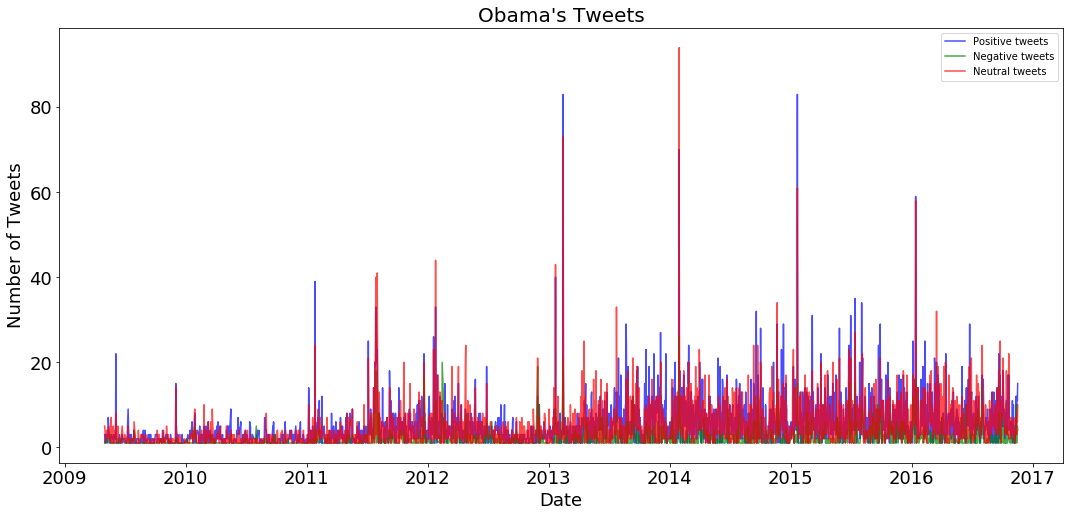

In [92]:
# Plot 
fig = plt.figure(figsize = (18,8))
plt.plot(list(timedict_1.keys()), list(new_df_pos.tweet_count), '-b', label='Positive tweets', alpha=0.7)
plt.plot(list(timedict_2.keys()), list(new_df_neg.tweet_count), '-g', label='Negative tweets', alpha=0.7)
plt.plot(list(timedict_3.keys()), list(new_df_neut.tweet_count), '-r', label = "Neutral tweets", alpha=0.7)
#plt.plot(list(timedict.keys()), list(deseasonalized))
plt.xlabel('Date', fontsize = 18)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.ylabel('Number of Tweets', fontsize=18)
leg = plt.legend()
#plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
plt.title("Obama's Tweets", fontsize = 20)
plt.show()

# Sources:
# https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/

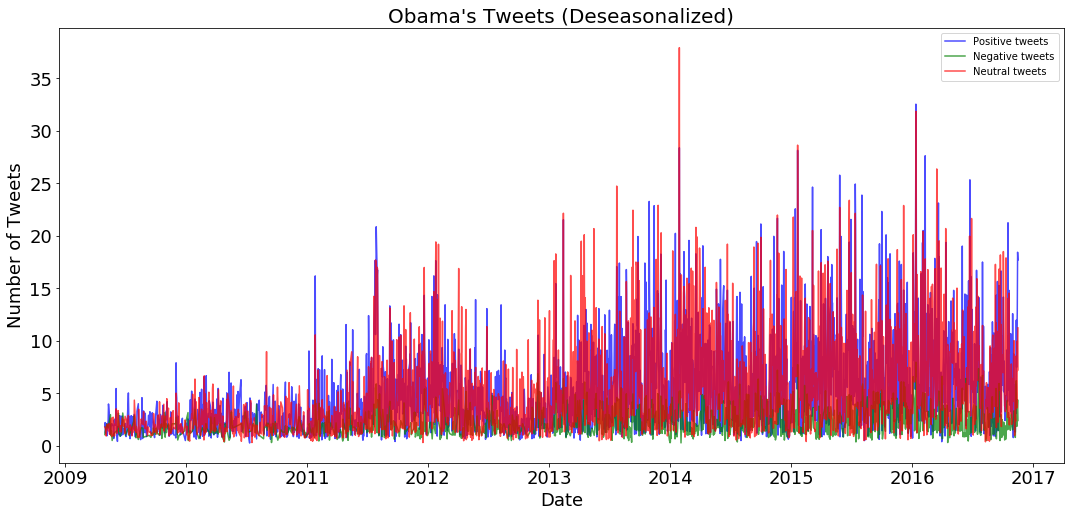

In [93]:
# Plot 
fig = plt.figure(figsize = (18,8))
plt.plot(list(timedict_1.keys()), list(deseasonalized_1), '-b', label='Positive tweets', alpha=0.7)
plt.plot(list(timedict_2.keys()), list(deseasonalized_2), '-g', label='Negative tweets', alpha=0.7)
plt.plot(list(timedict_3.keys()), list(deseasonalized_3), '-r', label = "Neutral tweets", alpha=0.7)
#plt.plot(list(timedict.keys()), list(deseasonalized))
plt.xlabel('Date', fontsize = 18)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.ylabel('Number of Tweets', fontsize=18)
leg = plt.legend()
#plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
plt.title("Obama's Tweets (Deseasonalized)", fontsize = 20)
plt.show()

# Sources:
# https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/

**Trump**

In [0]:

# Time series plot for trump's tweets
def givedate(timestamp):
    date_string = timestamp.date()
    return date_string

df_trump_timeseries = df_trump.copy()
df_trump_timeseries['timestamp'] = pd.to_datetime( df_trump['date'] + ' ' + df_trump['time'])

df_trump_pos = df_trump_timeseries[df_trump_timeseries['sentiment'] == 'positive']
df_trump_neg = df_trump_timeseries[df_trump_timeseries['sentiment'] == 'negative']
df_trump_neut = df_trump_timeseries[df_trump_timeseries['sentiment'] == 'neutral']


# Create dictionary with keys as dates and values as freuquency of tweets
df_trump_timeseries['date'] = df_trump_timeseries['timestamp'].apply(givedate)
dates = df_trump_timeseries.groupby('date')
datecount = dates['tweet'].count()
timedict = datecount.to_dict()


In [95]:

df_trump_pos['date'] = df_trump_pos['timestamp'].apply(givedate)
dates_1 = df_trump_pos.groupby('date')
datecount_1 = dates_1['tweet'].count()
timedict_1 = datecount_1.to_dict()

df_trump_neg['date'] = df_trump_neg['timestamp'].apply(givedate)
dates_2 = df_trump_neg.groupby('date')
datecount_2 = dates_2['tweet'].count()
timedict_2 = datecount_2.to_dict()

df_trump_neut['date'] = df_trump_neut['timestamp'].apply(givedate)
dates_3 = df_trump_neut.groupby('date')
datecount_3 = dates_3['tweet'].count()
timedict_3 = datecount_3.to_dict()



 # Convert dictionary to dataframe
new_df_all = pd.DataFrame(list(timedict.items()))
new_df_all.columns = ['date', 'tweet_count']
new_df_all.set_index('date')

new_df_pos = pd.DataFrame(list(timedict_1.items()))
new_df_pos.columns = ['date', 'tweet_count']
new_df_pos.set_index('date')

new_df_neg = pd.DataFrame(list(timedict_2.items()))
new_df_neg.columns = ['date', 'tweet_count']
new_df_neg.set_index('date')

new_df_neut = pd.DataFrame(list(timedict_3.items()))
new_df_neut.columns = ['date', 'tweet_count']
new_df_neut.set_index('date')

new_df_neut


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

,date,tweet_count
0,2009-05-12,2
1,2009-05-14,1
2,2009-05-15,1
3,2009-05-16,1
4,2009-05-22,1
...,...,...
1775,2017-01-21,1
1776,2017-01-24,2
1777,2017-01-25,1
1778,2017-01-26,2


In [96]:


# Deseasonalize data using moving averages 
# Time Series Decomposition
print(type(new_df_all.date.values))
print((new_df_all.date.values))
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(new_df_all['tweet_count'], model='multiplicative', extrapolate_trend='freq', freq = 365)
result_mul_1 = seasonal_decompose(new_df_pos['tweet_count'], model='multiplicative', extrapolate_trend='freq', freq = 365)
result_mul_2 = seasonal_decompose(new_df_neg['tweet_count'], model='multiplicative', extrapolate_trend='freq', freq = 365)
result_mul_3 = seasonal_decompose(new_df_neut['tweet_count'], model='multiplicative', extrapolate_trend='freq', freq = 365)


<class 'numpy.ndarray'>
[datetime.date(2009, 5, 4) datetime.date(2009, 5, 8)
 datetime.date(2009, 5, 12) ... datetime.date(2017, 1, 25)
 datetime.date(2017, 1, 26) datetime.date(2017, 1, 27)]


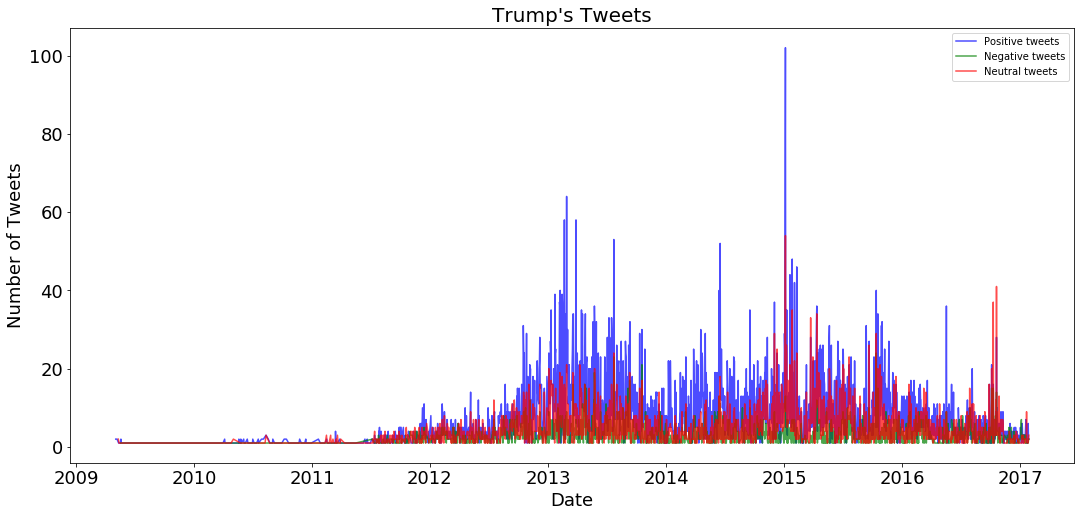

In [97]:


# Deseasonalize
deseasonalized = new_df_all['tweet_count'].values / result_mul.seasonal
deseasonalized_1 = new_df_pos['tweet_count'].values / result_mul_1.seasonal
deseasonalized_2 = new_df_neg['tweet_count'].values / result_mul_2.seasonal
deseasonalized_3 = new_df_neut['tweet_count'].values / result_mul_3.seasonal


# Plot 
fig = plt.figure(figsize = (18,8))
plt.plot(list(timedict_1.keys()), list(new_df_pos.tweet_count), '-b', label='Positive tweets', alpha=0.7)
plt.plot(list(timedict_2.keys()), list(new_df_neg.tweet_count), '-g', label='Negative tweets', alpha=0.7)
plt.plot(list(timedict_3.keys()), list(new_df_neut.tweet_count), '-r', label = "Neutral tweets", alpha=0.7)
#plt.plot(list(timedict.keys()), list(deseasonalized))
plt.xlabel('Date', fontsize = 18)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.ylabel('Number of Tweets', fontsize=18)
leg = plt.legend()
#plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
plt.title("Trump's Tweets", fontsize = 20)
plt.show()

# Sources:
# https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/


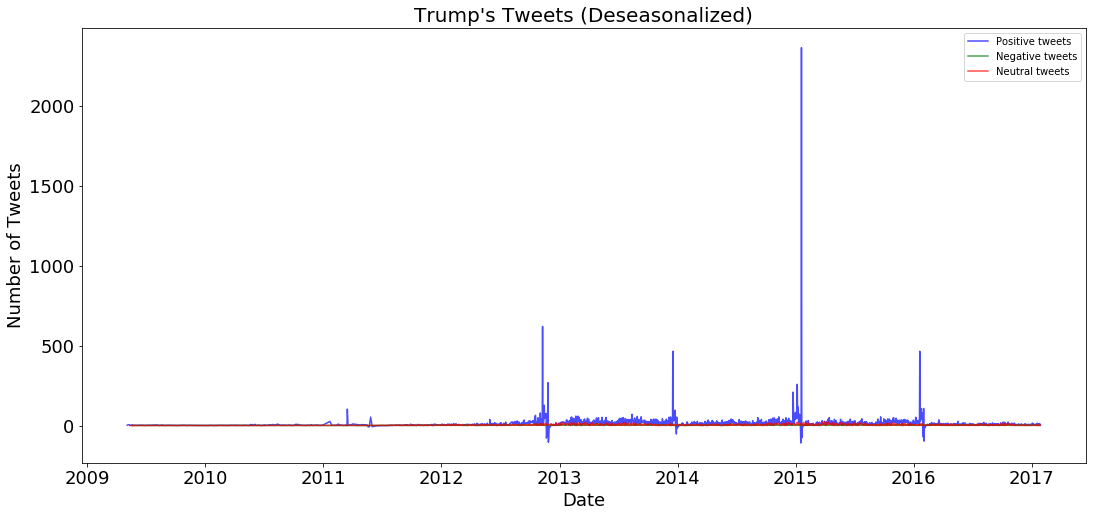

In [98]:
# Plot 
fig = plt.figure(figsize = (18,8))
plt.plot(list(timedict_1.keys()), list(deseasonalized_1), '-b', label='Positive tweets', alpha=0.7)
plt.plot(list(timedict_2.keys()), list(deseasonalized_2), '-g', label='Negative tweets', alpha=0.7)
plt.plot(list(timedict_3.keys()), list(deseasonalized_3), '-r', label = "Neutral tweets", alpha=0.7)
#plt.plot(list(timedict.keys()), list(deseasonalized))
plt.xlabel('Date', fontsize = 18)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.ylabel('Number of Tweets', fontsize=18)
leg = plt.legend()
#plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
plt.title("Trump's Tweets (Deseasonalized)", fontsize = 20)
plt.show()

# Sources:
# https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/

## Classifiers

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


#### Obama
**Naive Bayes**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_obama['tweet'], df_obama['sentiment'], test_size=0.2)


In [0]:
nb_pipeline = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [103]:
nb_pipeline.fit(X_train, y_train)
predictions = nb_pipeline.predict(X_test)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='weighted'))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.72      0.82      0.77      2187
    positive       0.92      0.67      0.78      3347

    accuracy                           0.73      5534
   macro avg       0.55      0.50      0.52      5534
weighted avg       0.84      0.73      0.77      5534

[[   0    0    0]
 [ 202 1794  191]
 [ 401  693 2253]]
0.7312974340440911
0.7739729508956568


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [105]:
parameters = {
    'bow__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),
}

X_train, X_test, y_train, y_test = train_test_split(df_obama['tweet'], df_obama['sentiment'], test_size=0.2)
nb_clf = GridSearchCV(nb_pipeline, parameters, cv=5, n_jobs=-1)
nb_clf = nb_clf.fit(X_train,y_train)
print(nb_clf.best_params_)

{'bow__ngram_range': (1, 2), 'clf__alpha': 0.01, 'tfidf__use_idf': False}

In [0]:
nb_gs_pipeline = Pipeline([
    ('bow',CountVectorizer(ngram_range=(1, 2) )),  
    ('tfidf', TfidfTransformer(use_idf=False)),  
    ('clf', MultinomialNB(alpha=0.01)),  
])

In [111]:
nb_gs_pipeline.fit(X_train,y_train)
predictions = nb_gs_pipeline.predict(X_test)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='macro'))

              precision    recall  f1-score   support

    negative       0.37      0.72      0.49       316
     neutral       0.75      0.82      0.79      2250
    positive       0.88      0.73      0.80      2968

    accuracy                           0.77      5534
   macro avg       0.67      0.76      0.69      5534
weighted avg       0.80      0.77      0.77      5534

[[ 227   40   49]
 [ 147 1850  253]
 [ 239  566 2163]]
0.7661727502710517
0.6903910122920749


**Logistic Regression**


In [116]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('bow',CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('clf', LogisticRegression()),  
])

parameters = {
    'bow__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__C': (0.25, 0.5, 1.0),
    'clf__penalty': ('l1', 'l2')
}

gs_clf = GridSearchCV(lr_pipeline, parameters, cv=5, n_jobs=-1)
gs_clf.fit(X_train, y_train)

predictions = gs_clf.predict(X_test)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='macro'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

    negative       0.71      0.86      0.78       505
     neutral       0.96      0.88      0.92      2703
    positive       0.90      0.95      0.92      2326

    accuracy                           0.91      5534
   macro avg       0.86      0.90      0.87      5534
weighted avg       0.91      0.91      0.91      5534

[[ 435   38   32]
 [ 119 2375  209]
 [  60   61 2205]]
0.906216118539935
0.8730468377771188


In [117]:
print(gs_clf.best_params_)

{'bow__ngram_range': (1, 1), 'clf__C': 1.0, 'clf__penalty': 'l1', 'tfidf__use_idf': True}


**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

parameters = {
    'bow__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__n_estimators': (10, 50),
}

gs_clf = GridSearchCV(rf_pipeline, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(msg_train,label_train)
print(gs_clf.best_params_)


predictions = gs_clf.predict(X_test)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='macro'))

**SVM**

In [141]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('bow',CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('clf', SVC()),
])

svc_pipeline.fit(X_train, y_train)
predictions = svc_pipeline.predict(X_test)

print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='weighted'))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.45      0.62      5534

    accuracy                           0.45      5534
   macro avg       0.33      0.15      0.21      5534
weighted avg       1.00      0.45      0.62      5534

[[   0    0    0]
 [   0    0    0]
 [ 585 2468 2481]]
0.4483194795807734
0.6190892077354959


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Trump**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_trump['tweet'], df_trump['sentiment'], test_size=0.2)


In [118]:
nb_pipeline.fit(X_train, y_train)
predictions = nb_pipeline.predict(X_test)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='weighted'))


              precision    recall  f1-score   support

    negative       0.04      0.97      0.08        40
     neutral       0.13      0.93      0.23       261
    positive       1.00      0.57      0.73      5776

    accuracy                           0.59      6077
   macro avg       0.39      0.82      0.35      6077
weighted avg       0.95      0.59      0.70      6077

[[  39    1    0]
 [  11  242    8]
 [ 893 1581 3302]]
0.5896001316439032
0.7013239208888518


In [120]:
nb_gs_pipeline.fit(X_train, y_train)
predictions = nb_gs_pipeline.predict(X_test)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='weighted'))


              precision    recall  f1-score   support

    negative       0.55      0.60      0.57       873
     neutral       0.51      0.81      0.62      1150
    positive       0.90      0.74      0.81      4054

    accuracy                           0.73      6077
   macro avg       0.65      0.71      0.67      6077
weighted avg       0.78      0.73      0.74      6077

[[ 522  160  191]
 [  85  927  138]
 [ 336  737 2981]]
0.728978114201086
0.7406563497232703


In [121]:
lr_pipeline = Pipeline([
     ('bow',CountVectorizer(ngram_range=(1, 1) )),  
    ('tfidf', TfidfTransformer(use_idf=True)),  
    ('clf', LogisticRegression(C=1.0, penalty='l1')),  
])

lr_pipeline.fit(X_train, y_train)
predictions = lr_pipeline.predict(X_test)

print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='weighted'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

    negative       0.78      0.93      0.85       795
     neutral       0.97      0.88      0.92      2014
    positive       0.94      0.96      0.95      3268

    accuracy                           0.93      6077
   macro avg       0.90      0.92      0.91      6077
weighted avg       0.93      0.93      0.93      6077

[[ 738   10   47]
 [ 109 1767  138]
 [  96   47 3125]]
0.9264439690636828
0.9272137115828775


In [133]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('bow',CountVectorizer(ngram_range=(1, 1) )),  
    ('tfidf', TfidfTransformer(use_idf=True)),  
    ('clf', RandomForestClassifier(n_estimators=50)),  
])

rf_pipeline.fit(X_train, y_train)
predictions = rf_pipeline.predict(X_test)

print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='weighted'))

              precision    recall  f1-score   support

    negative       0.40      0.91      0.55       409
     neutral       0.75      0.76      0.76      1800
    positive       0.92      0.78      0.85      3868

    accuracy                           0.79      6077
   macro avg       0.69      0.82      0.72      6077
weighted avg       0.83      0.79      0.80      6077

[[ 373   12   24]
 [ 177 1370  253]
 [ 393  442 3033]]
0.7859141023531347
0.7989766530183621


In [139]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('bow',CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('clf', SVC()),
])

svc_pipeline.fit(X_train, y_train)
predictions = svc_pipeline.predict(X_test)

print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))
print(accuracy_score(predictions,y_test))
print(f1_score(predictions,y_test, average='weighted'))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.54      0.71      6077

    accuracy                           0.54      6077
   macro avg       0.33      0.18      0.24      6077
weighted avg       1.00      0.54      0.71      6077

[[   0    0    0]
 [   0    0    0]
 [ 943 1824 3310]]
0.5446766496626625
0.7052306381165442


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


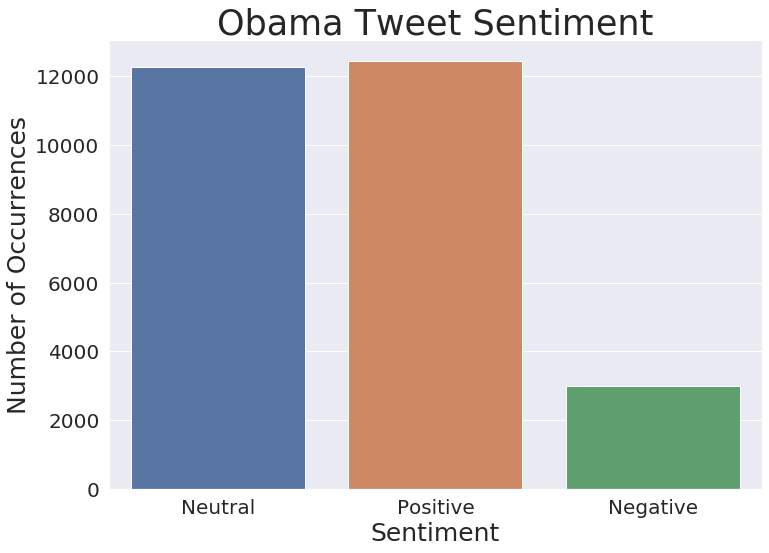

In [0]:

parameters_multinomial_nb = {
  'bow__ngram_range': [(1, 1), (1, 2)],
  'tfidf__use_idf': (True, False),
  'clf__alpha': (1e-2, 1e-3),
}

parameters_random_foest = {
  'bow__ngram_range': [(1, 1), (1, 2)],
  'tfidf__use_idf': (True, False),
  'clf__n_estimators': (10, 50),
}

parameters_random_foest = {
    'clf__alpha': (1e-2, 1e-3),
}


**Word Clouds and Sentiment Analysis**

In [0]:
import seaborn as sns

sentiment_counts = df_obama.sentiment.value_counts()
labels=['Neutral', 'Positive', 'Negative']
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="sentiment", data=df_obama, )
ax.set_xlabel('Sentiment', fontsize=25)
ax.set_ylabel('Number of Occurrences', fontsize=25)
plt.tick_params(labelsize=20)
ax.set_title('Obama Tweet Sentiment', fontsize=35)
ax.set_xticklabels(labels, fontsize=20)
plt.show()

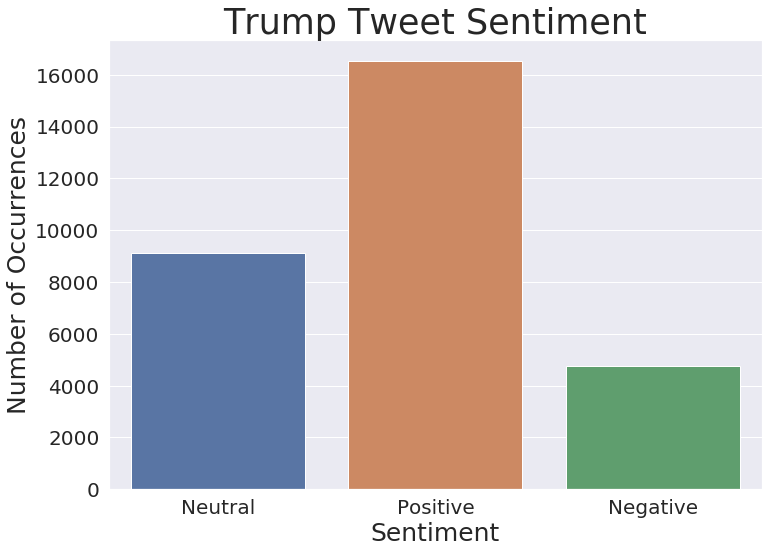

In [123]:
sentiment_counts = df_trump.sentiment.value_counts()
labels=['Neutral', 'Positive', 'Negative']
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="sentiment", data=df_trump, )
ax.set_xlabel('Sentiment', fontsize=25)
ax.set_ylabel('Number of Occurrences', fontsize=25)
plt.tick_params(labelsize=20)
ax.set_title('Trump Tweet Sentiment', fontsize=35)
ax.set_xticklabels(labels, fontsize=20)
plt.show()

In [0]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [127]:
df_obama[(df_obama.sentiment == 'positive')][['processed']].apply(count_words)['processed'].most_common(20)

[('obama', 3976),
 ('president', 3010),
 ('s', 1998),
 ('new', 1271),
 ('watch', 1223),
 ('amp', 1208),
 ('i', 1201),
 ('live', 1186),
 ('we', 1148),
 ('american', 1047),
 ('the', 942),
 ('first', 900),
 ('today', 892),
 ('u', 811),
 ('make', 680),
 ('year', 651),
 ('job', 634),
 ('people', 623),
 ('america', 616),
 ('right', 598)]

In [0]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
targets_obama = df_obama.sentiment.apply(sentiment2target)
targets_trump = df_trump.sentiment.apply(sentiment2target)


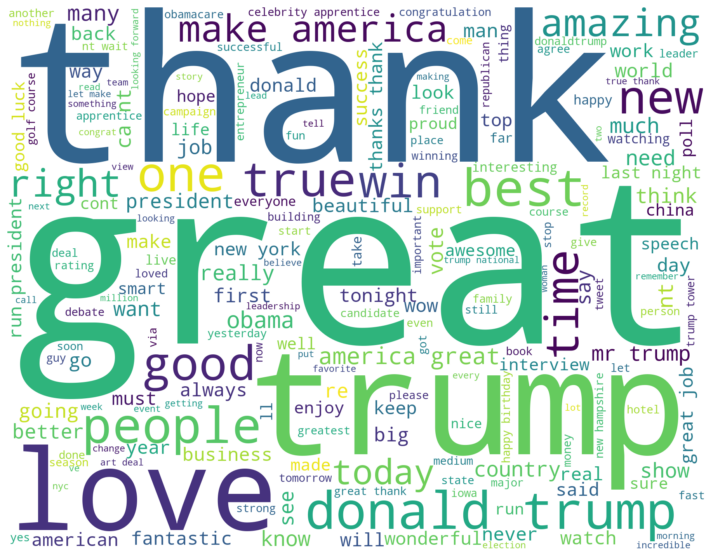

In [130]:
words = []
for tweet in df_trump['processed'][df_trump['sentiment'] == 'positive']:
  words.append(tweet)
flat_list = [item for sublist in words for item in sublist]

string_of_all_tweets = " ".join(flat_list)

# Wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
text = string_of_all_tweets
wordcloud = WordCloud(background_color='white', width=1800, height=1400).generate(text)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

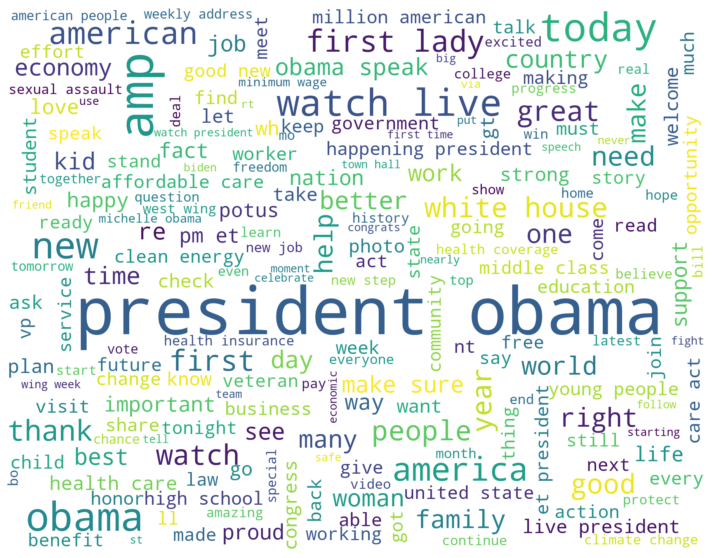

In [131]:
words = []
for tweet in df_obama['processed'][df_obama['sentiment'] == 'positive']:
  words.append(tweet)
flat_list = [item for sublist in words for item in sublist]

string_of_all_tweets = " ".join(flat_list)

# Wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
text = string_of_all_tweets
wordcloud = WordCloud(background_color='white', width=1800, height=1400).generate(text)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()